# -----------------------------------------------------------
# Dataset sur la classification des déchets
# 400  lignes.
# 3 features : Type, Poids(en Kg) et Taille(en cm)
# 1 target : Recyclable
# -----------------------------------------------------------


# Bibliothèque utilisés 

In [1]:
#importation des bibliothèques 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# Importation de la dataset

In [2]:

data = pd.read_csv("/home/dumping/dataset_recyclage_classification.csv")
data.head()


,Type,Poids,Taille,Recyclable
0,Plastique,54.714378,7.325677,0
1,Verre,145.461562,28.910958,0
2,Plastique,97.153397,29.328580,0
3,Plastique,126.285604,33.684346,0
4,Plastique,186.134971,37.674110,0


# Prétraitement des données

In [5]:
# Etant donné que notre dataset comportait un champs qualitatif(Type), nous avons 
# proceder de cette façon pour le transformer en quantitatif
# Plastique -> 1
# Papier -> 2
# Verre -> 3
# Métal -> 4

liste = []
for i in range(data.shape[0]):
    if(data.iloc[i, 0] == 'Plastique'):
        liste.append(1)
    elif(data.iloc[i, 0] == 'Papier'):
        liste.append(2)
    elif(data.iloc[i, 0] == 'Verre'):
        liste.append(3)
    else:
        liste.append(4)
data['Type'] = liste
data

,Type,Poids,Taille,Recyclable
0,4,54.714378,7.325677,0
1,4,145.461562,28.910958,0
2,4,97.153397,29.328580,0
3,4,126.285604,33.684346,0
4,4,186.134971,37.674110,0
...,...,...,...,...
395,4,455.243368,36.410745,1
396,4,476.241399,94.211950,1
397,4,347.796614,39.577304,1
398,4,393.827788,96.516615,1


# Creation des X_train, X_test, y_train, y_test 

In [9]:

# Diviser le jeu de données en caractéristiques (X) et la cible (y)
X, y = data.iloc[:, :3], data['Recyclable']

# Normaliser les caractéristiques
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("\nDimension des données d'antrainementet de test \n")
print(f"X-train : {X_train.shape}")
print(f"X-test : {X_test.shape}")
print(f"y-train : {y_train.shape}")
print(f"y-test : {y_test.shape}")


Dimension des données d'antrainementet de test 

X-train : (320, 3)
X-test : (80, 3)
y-train : (320,)
y-test : (80,)


# Influence de chques features sur la target

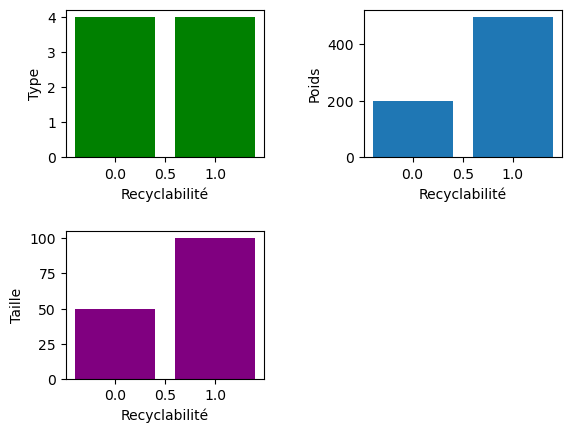

In [10]:
#creation d'une figure pour contenir les graphes 
fig = plt.figure()

#ajout des axes pour les differents graphes
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

#creation des des differents graphes 
ax1.bar(y, X.Type, color="green")
ax1.set_ylabel("Type")
ax1.set_xlabel("Recyclabilité")

ax2.bar(y, X.Poids)
ax2.set_xlabel("Recyclabilité")
ax2.set_ylabel("Poids")

ax3.bar(y, X.Taille, color = "purple")
ax3.set_xlabel("Recyclabilité")
ax3.set_ylabel("Taille")

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

# Nuage de points des données d'antrainement..

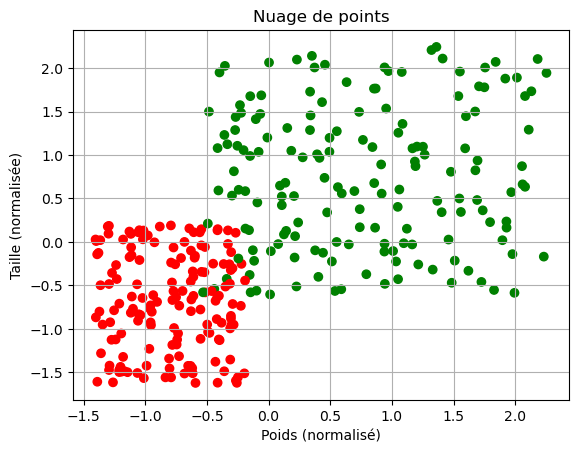

In [272]:

colors = np.array(["red", "green"])
plt.scatter(X_train[:, 1], X_train[:, 2], c = colors[y_train])
plt.title('Nuage de points')
plt.xlabel('Poids (normalisé)')
plt.ylabel('Taille (normalisée)')

plt.grid(True)
plt.show()


# Creation d'un objet Perceptron

In [12]:

#creation du modèle perceptron 
perceptron = Perceptron(max_iter=1000, random_state=42)


# Entrainement du perceptron 

In [13]:

perceptron.fit(X_train, y_train)


Perceptron(random_state=42)

# Poids des données après entraînement 

In [14]:

coef = perceptron.coef_[0]
print(coef)
print(f"Pour la donnée Taille >> {coef[2]}")
print(f"Pour la donnée Poids >> {coef[1]}")
print(f"Pour la donnée Type >> {coef[0]}")


[0.         4.31075655 2.37591575]
Pour la donnée Taille >> 2.375915745092633
Pour la donnée Poids >> 4.310756549492542
Pour la donnée Type >> 0.0


# Droite de classification des données d'entrainement

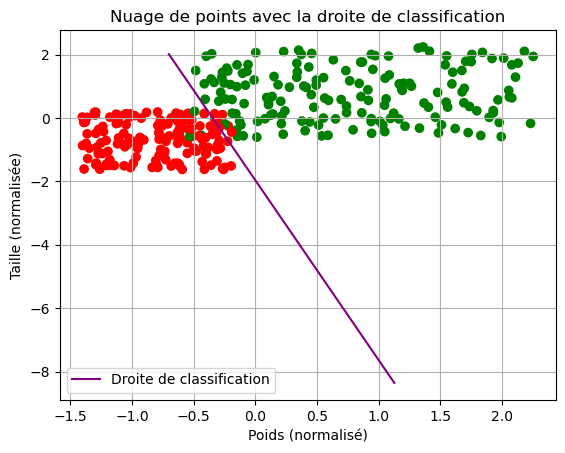

In [275]:

# Visualisation du nuage de points avec la droite de classification
plt.scatter(X_train[:, 1], X_train[:, 2], c=colors[y_train])
plt.title('Nuage de points avec la droite de classification')
plt.xlabel('Poids (normalisé)')
plt.ylabel('Taille (normalisée)')

# Tracer la droite de classification y = ax + b
coeff = -coef[1] / coef[2]
xx = np.linspace(X_train[:, 1].min()/2, X_train[:, 1].max()/2, 100)
yy = coeff * xx - (perceptron.intercept_ / coef[2])
plt.plot(xx, yy, color='purple', linestyle='solid', label='Droite de classification')

# Afficher la légende
plt.legend()

# Afficher le graphe
plt.grid(True)
plt.show()


# Courbe des erreurs et courbe des predictions des données de d'entrainement

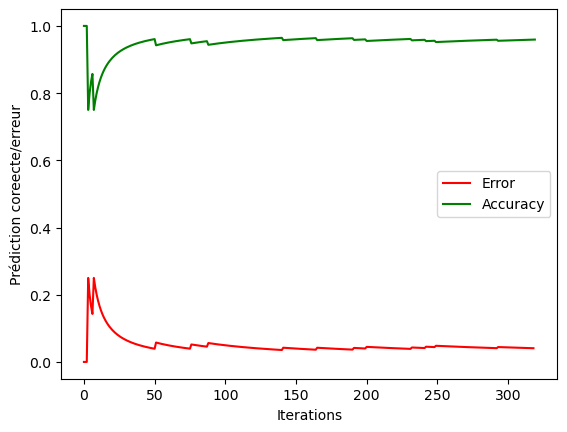

In [253]:
#prediction des valeurs de d'entrainement
y_pred = perceptron.predict(X_train) 

#calcul de l'erreur
errors = y_pred - y_train

#calcul de la moyenne des erreurs a chaque iteration
error_rate = [np.mean(np.abs(errors[:i])) for i in range(1, len(errors))]

#calul du taux de bonne prediction a chaque iteration 
accuracies = [accuracy_score(y_train[:i+1], y_pred[:i+1]) for i in range(len(y_pred))]

plt.plot(range(len(error_rate)), error_rate, "red", label = "Error")

plt.plot(range(len(accuracies)), accuracies, "green", label= "Accuracy")

plt.xlabel('Iterations')
plt.ylabel('Prédiction coreecte/erreur')
plt.legend()

plt.show()

# Matrice de confusion des données d'entrainement

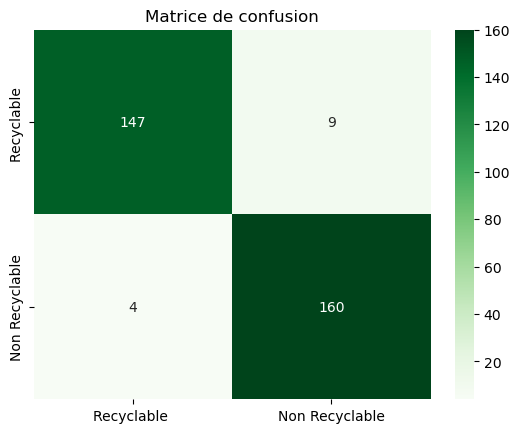

In [282]:
y_pred = perceptron.predict(X_train)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_train, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Recyclable ', 'Non Recyclable'], yticklabels=['Recyclable ', 'Non Recyclable'])
plt.title('Matrice de confusion')
plt.show()

# Pourcentage de reconnaissance des données  d'entraînements

In [124]:
score = perceptron.score(X_train, y_train)

taux = score * 100

print(f"{taux}%")

95.9375%


# Nuage de points des données de test..

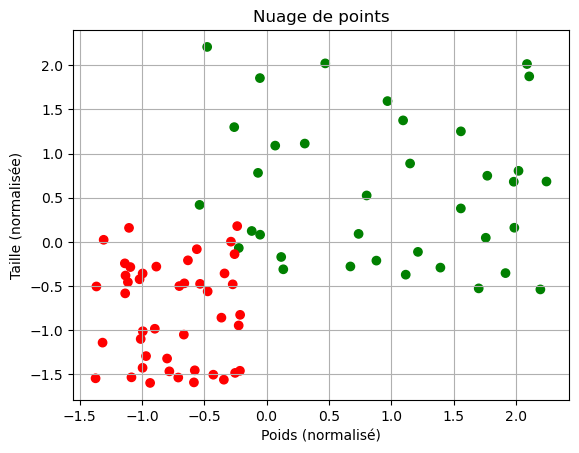

In [255]:

colors = np.array(['red', 'green'])
plt.scatter(X_test[:, 1], X_test[:, 2], c = colors[y_test])
plt.title('Nuage de points')
plt.xlabel('Poids (normalisé)')
plt.ylabel('Taille (normalisée)')
plt.grid(True)
plt.show()


# Droite de regression des données de test

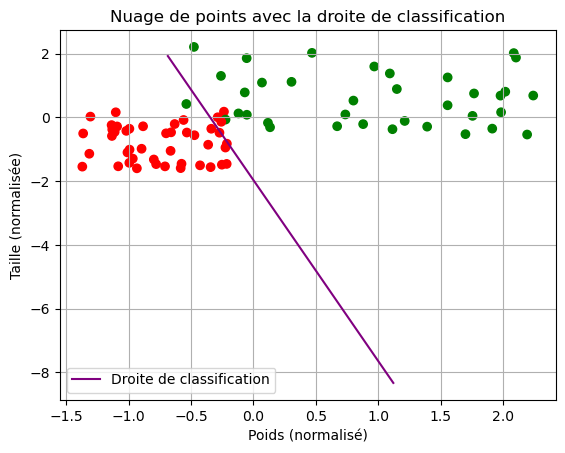

In [256]:
# Visualisation du nuage de points avec la droite de classification
plt.scatter(X_test[:, 1], X_test[:, 2], c=colors[y_test])
plt.title('Nuage de points avec la droite de classification')
plt.xlabel('Poids (normalisé)')
plt.ylabel('Taille (normalisée)')

# Tracer la droite de classification y = ax + b 
coeff = -coef[1] / coef[2]
xx = np.linspace(X_test[:, 1].min()/2, X_test[:, 1].max()/2, 100)
yy = coeff * xx - perceptron.intercept_ / coef[2]
plt.plot(xx, yy, color='purple', linestyle='-', label='Droite de classification')

# Afficher la légende
plt.legend()

# Afficher le graphe
plt.grid(True)
plt.show()

# Courbe des erreurs et courbe des predictions des données de test

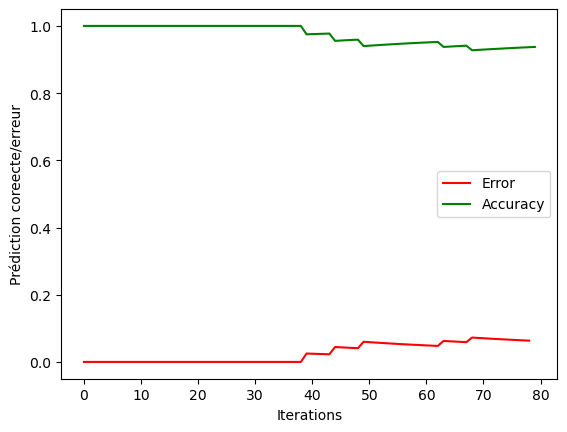

In [283]:
#prediction des valeurs de test
y_pred = perceptron.predict(X_test) 

#calcul de l'erreur
errors = y_pred - y_test

#calcul de la moyenne des erreurs a chaque iteration
error_rate = [np.mean(np.abs(errors[:i])) for i in range(1, len(errors))]

#calul du taux de bonne prediction a chaque iteration 
accuracies = [accuracy_score(y_test[:i+1], y_pred[:i+1]) for i in range(len(y_pred))]
plt.plot(range(len(error_rate)), error_rate, "red", label = "Error")
plt.plot(range(len(accuracies)), accuracies, "green", label= "Accuracy")

plt.xlabel('Iterations')
plt.ylabel('Prédiction coreecte/erreur')
plt.legend()

plt.show()


# Pourcentage de reconnaissance des données  de tests

In [258]:
score = perceptron.score(X_test, y_test)

taux = score * 100

print(f"{taux}%")

93.75%


# Matrice de confusion des données de test

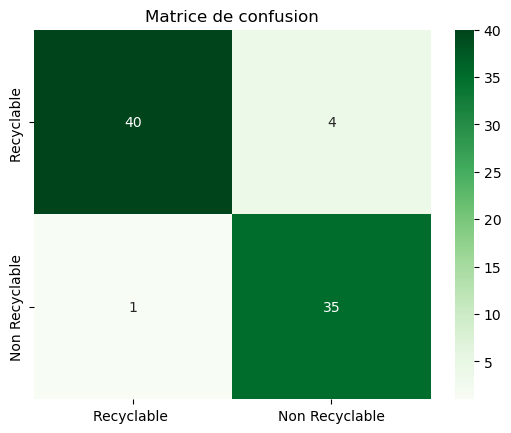

In [284]:
y_pred = perceptron.predict(X_test)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Recyclable ', 'Non Recyclable'], yticklabels=['Recyclable ', 'Non Recyclable'])
# plt.xlabel('Predicted')
# plt.ylabel('True')
plt.title('Matrice de confusion')
plt.show()